# Problem Definition and Description

Automatic digit recognition is of popular interest today. Deep Learning techniques makes it possible for object recognition in image data. <br>The MNIST handwritten digit classification problem is common in computer vision and deep learning. It can be used to identify hand-written digits ranging from 0-9.<br>In terms of machine learning and computer vision, it is a classification problem, where the primary outcome is the identification and classification of handwritten digits by machines ranging from 0-9.<br>
Without further ado, lets dive into the dataset and preprocessing.

# The Dataset

The dataset used to solve this problem is the MNIST (Modified National Institute of Standards and Technology database) dataset
which is a large collection of labeled handwriten digits. The dataset was initially created by "re-mixing" the samples 
from the original NIST dataset. <br>
The dataset consists of 28 x 28 pixel images and has a total of around 70,000 images of handwriten digits. Out of these, there are around 60,000 training images and 10,000 testing images.<br> Here is a breif peek over the dataset:
<img src="files/data.png">
<br> We now discuss data preprocessing and other formalities needed to be done before applying the model.

# Pre-Processing

We now have a first look at the images in the dataset and see if there is a need of pre-processing and try to find how much pre-processing the dataset need. Using Keras and Pyplot, we plot the first nine images in the dataset.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


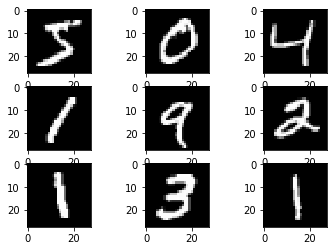

In [5]:
from keras.datasets import mnist
from matplotlib import pyplot
from sklearn.datasets import fetch_openml
# To download the data
mnist_data = fetch_openml('mnist_784') 
(trainX, trainy), (testX, testy) = mnist.load_data()
# plot first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)
pyplot.show()

In [6]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Using the above code, we see the first 9 images of the data and observe the distribution of images in the Training and Testing data. We also see each image size is 28 x 28. We now move to Exploratory data analysis.

# Exploratory data analysis

In [7]:
mnist_data.DESCR
#Description of the MNIST dataset ->

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [8]:
print(len(mnist_data))
print(mnist_data.keys())

9
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


Index is: 15825


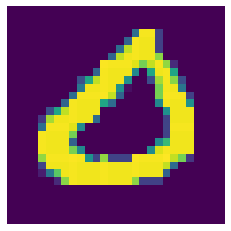

In [10]:
import random
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()
index = random.randint(0, 70000)
print('Index is: ' + str(index))
random_digit = trainX[index]
random_digit_image = random_digit.reshape(28, 28)
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()

# The Model (Building)

### We make use of Convolutional Neural Networks to classify the images

In [11]:
input_width = 28
input_height = 28
channels = 1
input_pixels = 784

conv1 = 32
conv2 = 64
stride1 = 1
stride2 = 1
filter1 = 5
filter2 = 5
maxpool1=2
maxpool2=2

hidden1 = 1024
out = 10
inputsizetohid = (input_width//(maxpool1*maxpool2)) * (input_height//(maxpool1*maxpool2)) *conv2

In [12]:
weights = {
    "wc1" : tf.Variable(tf.random.normal([filter1,filter1,channels,conv1])),
    "wc2" : tf.Variable(tf.random.normal([filter2,filter2,conv1,conv2])),
    "wh1" : tf.Variable(tf.random.normal([inputsizetohid,hidden1])),
    "wo" : tf.Variable(tf.random.normal([hidden1,out]))
}

biases = {
        "bc1" : tf.Variable(tf.random.normal([conv1])),
        "bc2" : tf.Variable(tf.random.normal([conv2])),
        "bh1" : tf.Variable(tf.random.normal([hidden1])),
        "bo" : tf.Variable(tf.random.normal([out]))

}

In [13]:
def conv(x,weights,bias,strides = 1):
    out = tf.nn.conv2d(x,weights,padding="SAME", strides = [1,strides,strides,1])
    out = tf.nn.bias_add(out,bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x,k=2):
    return  tf.nn.max_pool(x,padding = "SAME", ksize = [1,k,k,1], strides = [1,k,k,1])

In [14]:
def cnn(x, weights, biases,keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_height, input_width,channels])
    convv1 = conv(x, weights['wc1'], biases['bc1'], stride1)
    conv1_pool = maxpooling(convv1, maxpool1)
    
    convv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], stride2)
    conv2_pool = maxpooling(convv2, maxpool2)
    
    hidden_input = tf.reshape(conv2_pool, shape = [-1, inputsizetohid])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    hidden_output = tf.nn.dropout(hidden_output_before_dropout,keep_prob) 
   
    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [15]:
x = tf.placeholder("float", [None, input_pixels])
y = tf.placeholder(tf.int32, [None, out])
keep_prob = tf.placeholder("float")
pred = cnn(x,weights,biases,keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
batch = 100
for i in range (38):
    print(i,end=' ')
    num_batches = int(mnist.train.num_examples/batch)
    total_cost = 0
    for j in range(num_batches):
        #print('#', end='')
        batch_x, batch_y = mnist.train.next_batch(batch)
        c, _ = sess.run([cost,optimize], feed_dict = {x:batch_x, y:batch_y,keep_prob:0.8})
        total_cost+=c

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 

In [19]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_preds  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels, keep_prob:1.0})
correct_preds.sum()

9868

In [20]:
accuracy = correct_preds.sum()/10000
accuracy

0.9868